# 1. Make predictions on a pre-trained model
## Key Points:
1. Data Loading and Preprocessing: Loads the CIFAR-10 dataset, normalizes the data, and one-hot encodes the labels.
2. Model Definition: Loads the pre-trained VGG16 model without the top layer and adds custom dense layers for CIFAR-10 classification.
3. Layer Freezing: Freezes all layers of the VGG16 base model to prevent them from being trained (no fine-tuning).
4. Model Compilation: Compiles the model with the Adam optimizer and categorical cross-entropy loss.
5. Training with Progress Bar: Trains the model with a progress bar for visual feedback.
6. Evaluation: Evaluates the model on the test dataset and prints out the performance metrics in a tabulated format.
* This code represents a minimalistic approach to transfer learning, where the pre-trained model is used as a feature extractor without any further training of its layers.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Training the model
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.3710 - loss: 1.7227 - val_accuracy: 0.5945 - val_loss: 1.1417
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6228 - loss: 1.0668 - val_accuracy: 0.6358 - val_loss: 1.0207
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6931 - loss: 0.8786 - val_accuracy: 0.7058 - val_loss: 0.8506
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7325 - loss: 0.7595 - val_accuracy: 0.7181 - val_loss: 0.8280
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7660 - loss: 0.6709 - val_accuracy: 0.7241 - val_loss: 0.8096
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7914 - loss: 0.5934 - val_accuracy: 0.7232 - val_loss: 0.8094
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8143 - loss: 0.5288 - val_accuracy: 0.7345 - val_loss: 0.7935
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.841

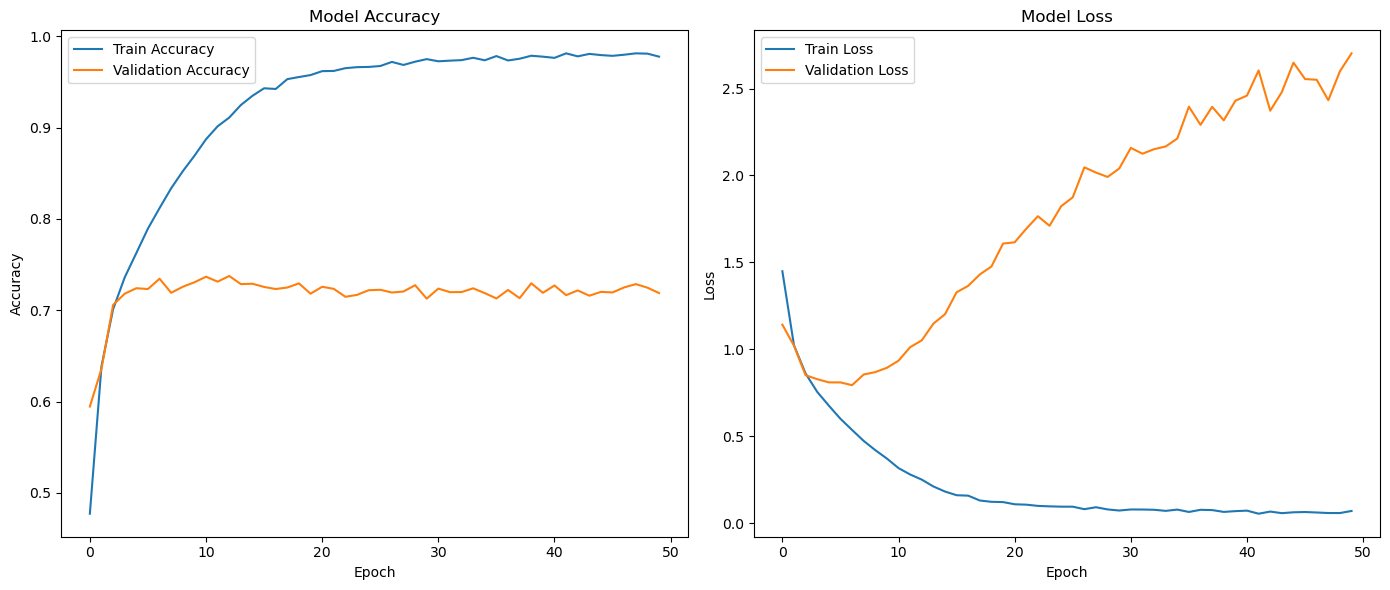

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the custom model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Set training parameters
num_epochs = 50
batch_size = 64

# Train the model
print("Training the model")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the final evaluation metrics
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)

# Print the precision, recall, and F1 score
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Define the custom model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Added dropout to help with regularization
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Set training parameters
num_epochs = 50
batch_size = 64

# Train the model
print("Training the model")
history = model.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test_onehot), verbose=1)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)

# Print the final evaluation metrics
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test.flatten()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)

# Print the precision, recall, and F1 score
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
    yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


Training the model
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4047 - loss: 1.7357 - val_accuracy: 0.5278 - val_loss: 1.3803
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5482 - loss: 1.3309 - val_accuracy: 0.5500 - val_loss: 1.3042
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5657 - loss: 1.2605 - val_accuracy: 0.5614 - val_loss: 1.2676
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5786 - loss: 1.2266 - val_accuracy: 0.5663 - val_loss: 1.2474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5857 - loss: 1.2046 - val_accuracy: 0.5747 - val_loss: 1.2310
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5989 - loss: 1.1776 - val_accuracy: 0.5786 - val_loss: 1.2219
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5978 - loss: 1.1669 - val_accuracy: 0.5760 - val_loss: 1.2169
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step -

# Fine-tune the pre-trained model
## Key Points:
1. **Data Loading and Preprocessing**: Loads the CIFAR-10 dataset, normalizes the data, and one-hot encodes the labels.
2. **Model Definition**: Loads the pre-trained VGG16 model without the top layer and adds custom dense layers for CIFAR-10 classification.
3. **Layer Freezing**: Initially freezes all layers of the VGG16 base model to prevent them from being trained during the initial training phase.
4. **Initial Training**: Trains the model with the base model layers frozen.
5. **Layer Unfreezing**: Unfreezes the last 4 layers of the base model for fine-tuning.
6. **Fine-Tuning Training**: Trains the model with some of the base model layers unfrozen.
7. **Evaluation**: Evaluates the model on the test dataset and prints out the performance metrics in a tabulated format.
* This approach allows the model to first learn the new task with the pre-trained weights and then fine-tune some of the deeper layers for potentially better performance.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.3748 - loss: 1.8184 - val_accuracy: 0.5470 - val_loss: 1.2623
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5722 - loss: 1.2011 - val_accuracy: 0.6103 - val_loss: 1.1909
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6585 - loss: 0.9837 - val_accuracy: 0.6694 - val_loss: 0.9629
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7107 - loss: 0.8290 - val_accuracy: 0.6622 - val_loss: 0.9822
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7407 - loss: 0.7417 - val_accuracy: 0.7302 - val_loss: 0.7931
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7701 - loss: 0.6572 - val_accuracy: 0.7128 - val_loss: 0.8261
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7919 - loss: 0.5897 - val_accuracy: 0.7516 - val_loss: 0.7429
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8142 - loss: 0.5353 - 

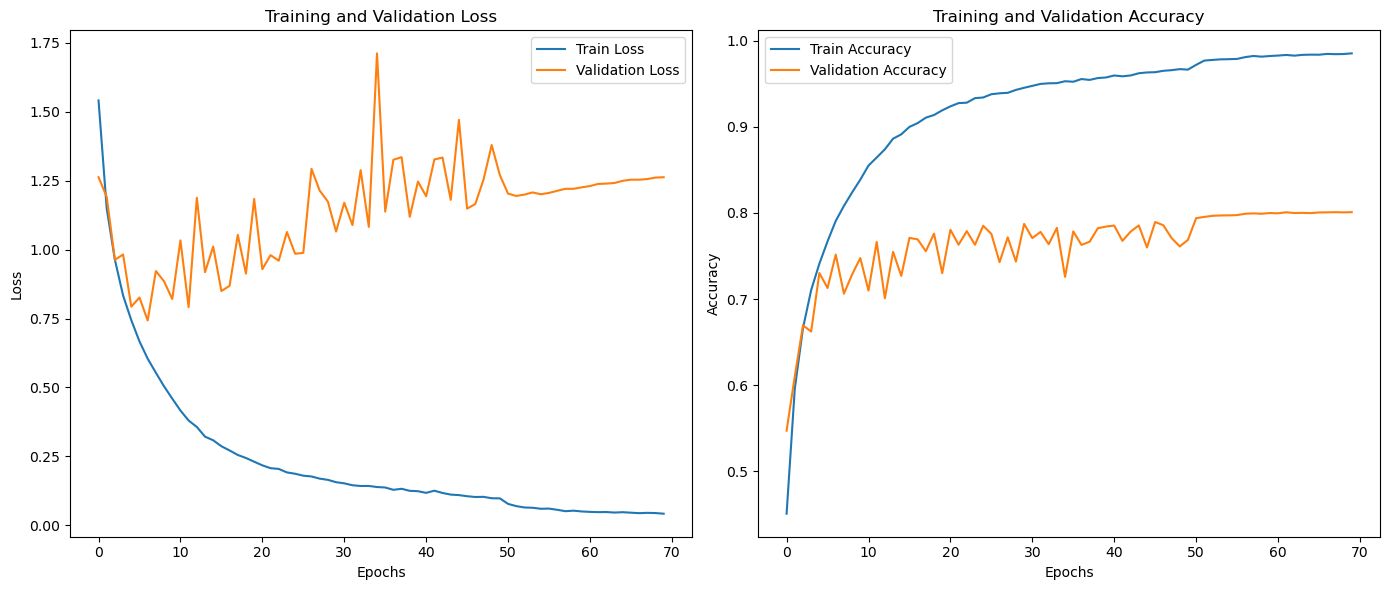

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


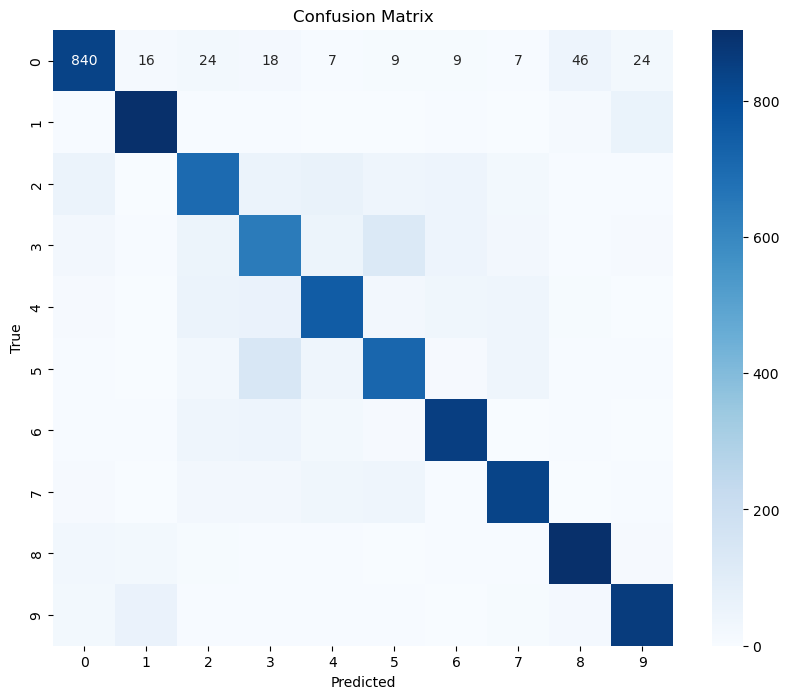

Precision: 0.8004
Recall: 0.8009
F1 Score: 0.8005


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom model architecture
def create_custom_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Added dropout to help with regularization
        Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])
    
    return model

# Create the model instance
model = create_custom_model()

# Print the model summary
model.summary()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compile the model for initial training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history_initial = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Compile the model for fine-tuning with a reduced learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model for additional 20 epochs
history_fine_tune = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Combine histories for plotting
history_combined = {
    'loss': history_initial.history['loss'] + history_fine_tune.history['loss'],
    'val_loss': history_initial.history['val_loss'] + history_fine_tune.history['val_loss'],
    'accuracy': history_initial.history['accuracy'] + history_fine_tune.history['accuracy'],
    'val_accuracy': history_initial.history['val_accuracy'] + history_fine_tune.history['val_accuracy'],
}

# Plot Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_combined['loss'], label='Train Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_combined['accuracy'], label='Train Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate detailed metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom model architecture
def create_custom_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Added dropout to help with regularization
        Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])
    
    return model

# Create the model instance
model = create_custom_model()

# Print the model summary
model.summary()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compile the model for initial training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history_initial = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

# Compile the model for fine-tuning with a reduced learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model for additional 20 epochs
history_fine_tune = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Combine histories for plotting
history_combined = {
    'loss': history_initial.history['loss'] + history_fine_tune.history['loss'],
    'val_loss': history_initial.history['val_loss'] + history_fine_tune.history['val_loss'],
    'accuracy': history_initial.history['accuracy'] + history_fine_tune.history['accuracy'],
    'val_accuracy': history_initial.history['val_accuracy'] + history_fine_tune.history['val_accuracy'],
}

# Plot Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_combined['loss'], label='Train Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_combined['accuracy'], label='Train Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate detailed metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.3983 - loss: 1.7848 - val_accuracy: 0.4966 - val_loss: 1.4833
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5908 - loss: 1.1580 - val_accuracy: 0.6220 - val_loss: 1.1128
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6637 - loss: 0.9527 - val_accuracy: 0.6133 - val_loss: 1.1222
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7096 - loss: 0.8315 - val_accuracy: 0.7176 - val_loss: 0.8199
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7477 - loss: 0.7287 - val_accuracy: 0.6502 - val_loss: 1.0564
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7781 - loss: 0.6393 - val_accuracy: 0.7579 - val_loss: 0.7093
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7966 - loss: 0.5822 - val_accuracy: 0.7275 - val_loss: 0.8211
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.8112 - loss: 0